
Activity 1: Detecting Phishing Websites using Neural Networks

The goal of this experiment is to prevent modern phishing website attacks using deep learning. 
To do this, you are going to use the Phishing Dataset given in the Activity1 booklet. 
It is highly recommended to read some references before completing this notebook. These references discuss the data generation strategy in details and how the authors were able to come up with the most significant set of features for detecting phishing websites.

Follow the notebook and fill the "todo" to complete the experiment.


Start off the experiment by importing the initial set of Python modules.

In [37]:
#todo: import pandas and numpy
import pandas as pd
import numpy as np

Data loading and basic display

In [39]:
#todo: upload the phishing.csv file
#todo: read csv file
data=pd.read_csv("phishing.csv")
#todo: display first 10 rows
data.head(10)

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
5,5,1,0,-1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
6,6,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
7,7,1,0,-1,1,1,-1,1,1,-1,...,1,1,1,-1,1,1,1,0,1,1
8,8,1,1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,0,-1,1,0,1,-1
9,9,1,1,1,1,1,-1,0,1,1,...,1,1,-1,1,1,1,1,-1,-1,1


Inspecting data dimensions and column names

In [40]:
# Data dimension
data.shape

(11054, 32)

In [41]:
# Data columns
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')


Finding out the distribution of the class labels

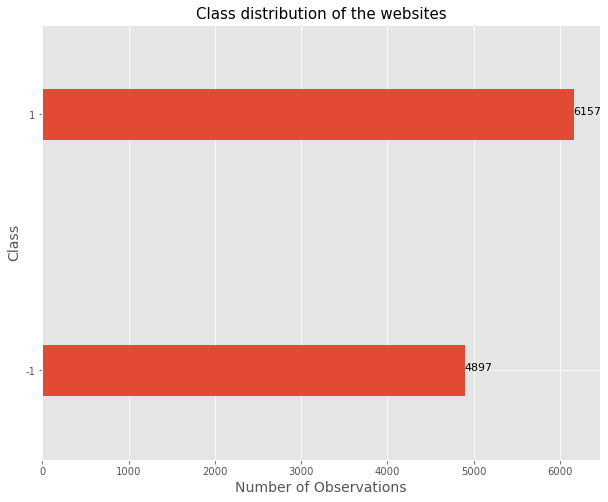

In [42]:
from collections import Counter

classes = Counter(data['class'].values)
classes.most_common()

class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Num_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

Finding out the summary statistics from the data

In [43]:
#todo: Find out the summary statistics from the data 
data.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finding out the basic information of the columns present in the dataset

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

Mapping the -1 values to 0 in the class labels

In [45]:
data['class'] = data['class'].map({-1:0, 1:1})
data['class'].unique()

array([0, 1], dtype=int64)

Inspection of null values in the dataset

In [46]:
df.isna().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

Data splitting

In [47]:
from sklearn.model_selection import train_test_split

#loading features 'X' and labels 'y' from the dataframe 'data'
X = data.iloc[:,1:31].values.astype(int)
y = data.iloc[:,31].values.astype(int)

#todo: split data into 80% training (X_train, y_train) and 20% testing (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=7) 

Explore the first row of X_train

In [48]:
X_train[0,:]

array([-1, -1,  1, -1,  1, -1,  0, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  0,  1,  1,  1,  1, -1,  1, -1,  1,  1,  0,  1])

Build the Neural Network

In [64]:
#todo: import the tensorflow library
# Import
!pip install keras
!pip install tensorflow
import tensorflow as tf
from keras.metrics import accuracy
from keras.engine import sequential
from keras.models import Sequential
from keras.layers import Dense
#todo: build the NN model using the Sequential API
model=Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation='sigmoid'))
#model.add(Dense(15,input_dim=8,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='softmax'))

#todo: compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
#todo: show the model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 256)               7936      
                                                                 
 dense_23 (Dense)            (None, 10)                2570      
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,517
Trainable params: 10,517
Non-trainable params: 0
_________________________________________________________________


Training the model

In [66]:
#todo: train the model
r=model.fit(X_train, y_train, epochs=50)

Epoch 1/50
277/277 [==============================] - 2s 4ms/step - loss: 0.3093 - accuracy: 0.5613
Epoch 2/50
277/277 [==============================] - 1s 4ms/step - loss: 0.1925 - accuracy: 0.5613
Epoch 3/50
277/277 [==============================] - 1s 4ms/step - loss: 0.1893 - accuracy: 0.5613
Epoch 4/50
277/277 [==============================] - 1s 4ms/step - loss: 0.1853 - accuracy: 0.5613
Epoch 5/50
277/277 [==============================] - 1s 4ms/step - loss: 0.1860 - accuracy: 0.5613
Epoch 6/50
277/277 [==============================] - 1s 4ms/step - loss: 0.1850 - accuracy: 0.5613
Epoch 7/50
277/277 [==============================] - 1s 4ms/step - loss: 0.1902 - accuracy: 0.5613
Epoch 8/50
277/277 [==============================] - 1s 4ms/step - loss: 0.1821 - accuracy: 0.5613
Epoch 9/50
277/277 [==============================] - 1s 4ms/step - loss: 0.1813 - accuracy: 0.5613
Epoch 10/50
277/277 [==============================] - 1s 4ms/step - loss: 0.1792 - accuracy: 0.5613

Visualizing the performance of the network

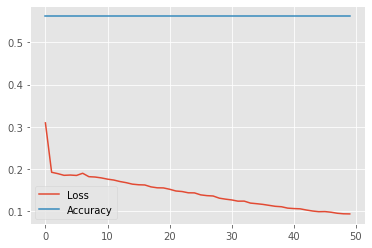

In [67]:
#todo plot the training loss and accuracy on the dataset
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['accuracy'], label='Accuracy')
plt.legend()

Evaluating the model

In [81]:
#todo: evaluate the model
_,accuracy=model.evaluate(X_test,y_test)
#todo: print the model accuray
print('Accuracy=%.2f'%(accuracy*100))

70/70 [==============================] - 0s 3ms/step - loss: 0.1285 - accuracy: 0.5396
Accuracy=53.96
